## Question 1

Rosenbrock's function is:
$$f(x,y) = (1-x)^{2}+100(y-x^{2})^{2}$$

Calculate 
$\log f
(
x
,
y
)
$
 on a grid of 
$x$
 and 
$y$
 values from 
$x\in [-2,2]$
and $y \in [-2,2]$ with 250 grid points in each direction. Plot the 
$\log
f
(
x
,
y
)$
 contours and include a colour bar to show the value of 
$\log
⁡
f
(
x
,
y
)
$

Starting from an initial value of 
$(
x
,
y
)
=
(
−
1
,
−
1
)$
, find the minima given by Rosenbrock's function using

1. the BFGS (or L-BFGS-B) algorithm,
2. the Nelder-Mead algorithm (also known as the simplex algorithm), and
3. an algorithm of your choice.

For each algorithm, record the 
$(
x
,
y
)$
 points trialled by the algorithm and plot these on the figure you have made. This will show the path of both optimisation algorithms. Be sure to include a legend so it is clear which path corresponds to which algorithm.


     |████████████████████████████████| 912 kB 16.9 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 26.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 11.2 MB/s eta 0:00:01
  Created wheel for jax: filename=jax-0.3.1-py3-none-any.whl size=1054277 sha256=4d9e9d0a9fc9e401ac3f715c10591db6fbff117dd76db2160a4b4a4506310d53
  Stored in directory: /Users/admzlm4/Library/Caches/pip/wheels/98/c3/90/e1acae597e44d78506ce11b219919f4e43ef85bf4a3cb8bfc5
Successfully built jax


<ipython-input-42-2eb0700624d0>:10: RuntimeWarning: divide by zero encountered in log
  return np.log(((1-x[0])**2+100*(x[1]-x[0]**2)**2))
/Users/admzlm4/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:734: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Text(0, 0.5, '$\\log(f(x,y))$')

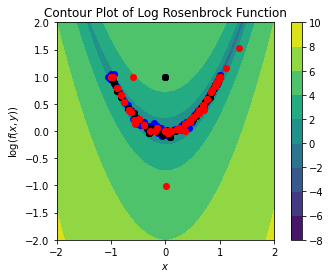

In [42]:
!pip install jax
import numpy as np 
import scipy.optimize as op
import matplotlib.pyplot as plt

import pandas as pd


def log_rosenbrock(x):
    return np.log(((1-x[0])**2+100*(x[1]-x[0]**2)**2))

x = np.linspace(-2,2,250)
y = np.linspace(-2, 2,250)

x_vals, y_vals = np.meshgrid(x,y, sparse=True) 

def rosenbrock(x):
    return np.exp(log_rosenbrock(x))



h = plt.contourf(x,y,(log_rosenbrock([x_vals, y_vals])))
plt.axis('scaled')
plt.colorbar()


# Optimize L-BFGS-B
op.minimize(rosenbrock, x0=[-1,1], method='L-BFGS-B')

#Optimize Nelder-Mead
op.minimize(log_rosenbrock, x0=[-1,1], method='Nelder-Mead')

#Optimize Sequential Least Squares Programming (Personal Choice)
op.minimize(log_rosenbrock, x0 = [-1, 1], method='SLSQP')


positions = []
# Define the objective function.

def objective_function(theta):
    positions.append(theta)
    x, y = theta
    coord_arr = [x,y]
    return rosenbrock(coord_arr)  

#Could make this section more concise with a for-loop
op.minimize(objective_function, [-1,1], method='Nelder-Mead')
positions = np.array(positions)

for i in range(len(positions)):
    plt.scatter(positions[i][0], positions[i][1], color='b')
    
positions = list(positions)
positions.clear()

op.minimize(objective_function, [-1, 1], method='L-BFGS-B')
positions = np.array(positions)

for j in range(len(positions)):
    plt.scatter(positions[j][0], positions[j][1], color='k')
    
positions = list(positions)
positions.clear()

op.minimize(objective_function, [-1,1], method='SLSQP')
positions = np.array(positions)

for k in range(len(positions)):
      plt.scatter(positions[k][0], positions[k][1], color='r')

plt.title("Contour Plot of Log Rosenbrock Function")
plt.xlabel(r'$x$')
plt.ylabel(r'$\log(f(x,y))$')

## Question 2

Text(0.5, 1.0, 'Plot of Data and Best Fit Model Parameter Curve')

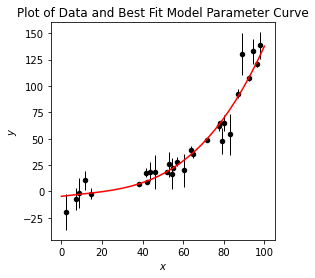

In [39]:
%matplotlib inline
#Data generation
np.random.seed(0)

N = 30

x = np.random.uniform(0, 100, N)

theta = np.random.uniform(-1e-3, 1e-3, size=(4, 1))

# Define the design matrix.
A = np.vstack([
    np.ones(N),
    x, 
    x**2, 
    x**3
]).T
      
y_true = (A @ theta).flatten()
y_err_intrinsic = 10 # MAGIC number!
y_err = y_err_intrinsic * np.random.randn(N)

y = y_true + np.random.randn(N) * y_err
y_err = np.abs(y_err)

x, y, y_err = data = np.array([x, y, y_err])



fig, ax = plt.subplots(figsize = (4,4))
# Define remaining matrices
Y = np.atleast_2d(y).T
C = np.diag(y_err**2)

# Determine optimal model parameter
C_inv = np.linalg.inv(C)
G = np.linalg.inv(A.T @ C_inv @ A)
best_fit_theta_matrix = G @ (A.T @ C_inv @ Y)

theta_0, theta_1,theta_2, theta_3 = best_fit_theta_matrix.T[0]

xl = np.linspace(0,100,30)
ax.scatter(x,y,c='k', edgecolor="k", lw=1, cmap='Greys',s=20)
ax.errorbar(x, y, yerr=y_err, fmt='none', lw=1,c="k", zorder=-1)
ax.plot(xl,((theta_0)+(theta_1*xl)+(theta_2*xl**2)+(theta_3*xl**3)), color = 'r')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Plot of Data and Best Fit Model Parameter Curve')

## Question 3

In this question we will use a Leapfrog integrator to integrate the motion of a particle in a potential. This will be used in Question 4 when you implement a Hamiltonian Monte Carlo sampler. Recall that at time 
t
 a particle in some system with a location 
$x
(
t
)$
 and a momentum 
$p
(
t
)$
 can be fully described by the Hamiltonian:
$$\mathcal{H}(\vec{x}, \vec{p}) = U(\vec{x})+ K(\vec{p})$$

where the sum of gravitational 
$U$
 and kinetic 
$K
$ energy remains constant with time. Let:

$$ K(\vec{p}) =\frac{\vec{p^{T}}{\vec{p}}{2}}$$
and $$U(\vec{x}) = -\log(p(\vec{x})$$


In [51]:
from jax import grad
def neg_log_prob(theta):
    return 0.5 * (theta - 1.2)**2
grad_neg_log_prob = grad(neg_log_prob)

AttributeError: partially initialized module 'jax' has no attribute '_src' (most likely due to a circular import)